In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cust-data/ecommerce_customer_data.csv


In [2]:
import pandas as pd

import plotly.express as px

import plotly.graph_objects as go
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("/kaggle/input/cust-data/ecommerce_customer_data.csv")
print(data.head())

   User_ID  Gender  Age   Location Device_Type  Product_Browsing_Time  \
0        1  Female   23  Ahmedabad      Mobile                     60   
1        2    Male   25    Kolkata      Tablet                     30   
2        3    Male   32  Bangalore     Desktop                     37   
3        4    Male   35      Delhi      Mobile                      7   
4        5    Male   27  Bangalore      Tablet                     35   

   Total_Pages_Viewed  Items_Added_to_Cart  Total_Purchases  
0                  30                    1                0  
1                  38                    9                4  
2                  13                    5                0  
3                  20                   10                3  
4                  20                    8                2  


In [4]:
numeric_summary= data.describe()
numeric_summary

,User_ID,Age,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,26.276000,30.740000,27.182000,5.150000,2.464000
std,144.481833,5.114699,15.934246,13.071596,3.203127,1.740909
min,1.000000,18.000000,5.000000,5.000000,0.000000,0.000000
25%,125.750000,22.000000,16.000000,16.000000,2.000000,1.000000
50%,250.500000,26.000000,31.000000,27.000000,5.000000,2.000000
75%,375.250000,31.000000,44.000000,38.000000,8.000000,4.000000
max,500.000000,35.000000,60.000000,50.000000,10.000000,5.000000


In [5]:
#categorical_summary=data.select_dtypes(include='object').describe()
categorical_summary=data.describe(include='object')
categorical_summary

,Gender,Location,Device_Type
count,500,500,500
unique,2,8,3
top,Male,Kolkata,Mobile
freq,261,71,178


In [6]:
# Histogram for 'Age'
fig = px.histogram(data, x='Age', title='Distribution of Age')
fig.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Age', ylabel='Count'>

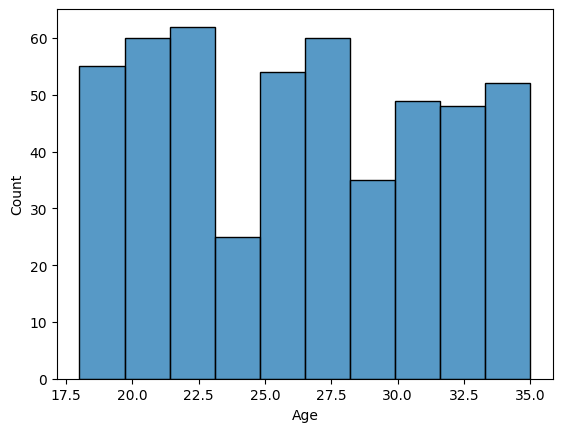

In [7]:
sns.histplot(data=data,x='Age')
#sns.distplot(sns.histplot(data=data,x='Age',kind=hist)

In [8]:
# Bar chart for 'Gender'
gender_counts = data['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
fig = px.bar(gender_counts, x='Gender', 
             y='Count', 
             title='Gender Distribution')
fig.show()

<Axes: xlabel='Gender', ylabel='count'>

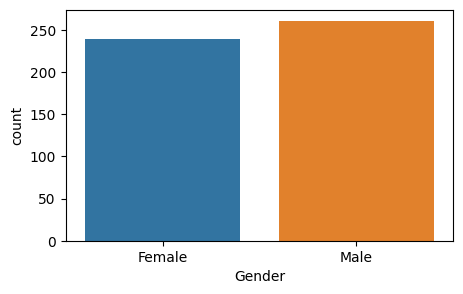

In [9]:
plt.figure(figsize=(5,3))
sns.countplot(x='Gender',data=data)

# Analyzing Customer Behaviour

In [10]:
 relationship between the product browsing time and the total pages viewed:

SyntaxError: invalid syntax (1659455496.py, line 1)

In [11]:
# 'Product_Browsing_Time' vs 'Total_Pages_Viewed'
fig = px.scatter(data, x='Product_Browsing_Time', y='Total_Pages_Viewed',
                 title='Product Browsing Time vs. Total Pages Viewed', 
                 trendline='ols')
fig.show()

* The above scatter plot shows no consistent pattern or strong association between the time spent browsing products and the total number of pages viewed. 
* It indicates that customers are not necessarily exploring more pages if they spend more time on the website, which might be due to various factors such as the website design, content relevance, or individual user preferences.

# average total pages viewed by gender:

In [12]:
# Grouped Analysis
gender_grouped = data.groupby('Gender')['Total_Pages_Viewed'].mean().reset_index()
gender_grouped.columns = ['Gender', 'Average_Total_Pages_Viewed']
fig = px.bar(gender_grouped, x='Gender', y='Average_Total_Pages_Viewed',
             title='Average Total Pages Viewed by Gender')
fig.show()

In [ ]:
data.columns

# average total pages viewed by devices:

In [ ]:
devices_grouped=data.groupby('Device_Type')['Total_Pages_Viewed'].mean().reset_index()
devices_grouped.columns = ['Device_Type', 'Average_Total_Pages_Viewed']
fig = px.bar(devices_grouped, x='Device_Type', y='Average_Total_Pages_Viewed',
             title='Average Total Pages Viewed by Devices')
fig.show()

# customer lifetime value and visualize segments based on the customer lifetime value:

In [13]:
data['CLV'] = (data['Total_Purchases'] * data['Total_Pages_Viewed']) / data['Age']

data['Segment'] = pd.cut(data['CLV'], bins=[1, 2.5, 5, float('inf')],
                         labels=['Low Value', 'Medium Value', 'High Value'])


In [ ]:
data.head(10)

In [14]:
segment_counts = data['Segment'].value_counts().reset_index()
#segment_counts
segment_counts.columns = ['Segment', 'Count']

# Create a bar chart to visualize the customer segments
fig = px.bar(segment_counts, x='Segment', y='Count', 
             title='Customer Segmentation by CLV')
fig.update_xaxes(title='Segment')
fig.update_yaxes(title='Number of Customers')
fig.show()

# conversion funnel of the customers:

In [15]:
# Funnel analysis
funnel_data = data[['Product_Browsing_Time', 'Items_Added_to_Cart', 'Total_Purchases']]
funnel_data = funnel_data.groupby(['Product_Browsing_Time', 'Items_Added_to_Cart']).sum().reset_index()

fig = px.funnel(funnel_data, x='Product_Browsing_Time', y='Items_Added_to_Cart', title='Conversion Funnel')
fig.show()

In the above graph, the x-axis represents the time customers spend browsing products on the e-commerce platform. The y-axis represents the number of items added to the shopping cart by customers during their browsing sessions.

# Churn rate of customers

In [16]:
data.columns

Index(['User_ID', 'Gender', 'Age', 'Location', 'Device_Type',
       'Product_Browsing_Time', 'Total_Pages_Viewed', 'Items_Added_to_Cart',
       'Total_Purchases', 'CLV', 'Segment'],
      dtype='object')

In [22]:
data['churn']=data['Total_Purchases']==0


In [23]:
#churn rate
churn_rate=data['churn'].mean()

In [24]:
churn_rate

0.198

A churn rate of 0.198 indicates that a significant portion of customers has churned, and addressing this churn is important for maintaining business growth and profitability.